## Loading necessary library and data

In [104]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx')
data.drop('Unnamed: 0', axis=1, inplace=True)
data['date']= pd.to_datetime(data[['Year', 'month','day']])
data.set_index('date', inplace=True)
data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


Creating tomorrow column by shifting the close price. Basically it has the closing price of tomorrow close price. Target will be the price will go up or down.

In [106]:
data['tomorrow']= data['Close'].shift(-1)

In [107]:
data['target']= (data['tomorrow']>data['Close']).astype(int)

In [108]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,tomorrow,target
date,,,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,0.145558,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,0.146034,1
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,0.140802,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,0.139374,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,0.134617,0
...,...,...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,137.869995,1
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,141.110001,1
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,142.529999,1


In [109]:
data.target.value_counts()

1    3282
0    3010
Name: target, dtype: int64

## Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=100, max_depth=3,random_state=1)

train = data.iloc[:5000]
test = data.iloc[5000:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(max_depth=3, min_samples_split=100, n_estimators=200,
                       random_state=1)

In [189]:
model.score(test[predictors],test['target'])

0.4796137339055794

In [190]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5217391304347826

In [191]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [192]:

ac = accuracy_score(test['target'],preds)
print('Accuracy is: ',ac)

Accuracy is:  0.4796137339055794


              precision    recall  f1-score   support

           0       0.47      0.90      0.62       443
           1       0.52      0.10      0.17       489

    accuracy                           0.48       932
   macro avg       0.50      0.50      0.39       932
weighted avg       0.50      0.48      0.38       932



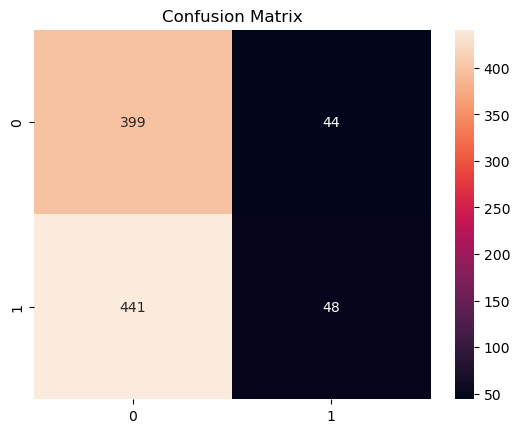

In [202]:
cm = confusion_matrix(test['target'], preds)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(test['target'], preds))
plt.title('Confusion Matrix')
plt.savefig('heat_map.png')

In [175]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_param={ 'n_estimators':[50,80,100,],
            'criterion' :['gini','entropy'],
            'max_depth' : range(1,15),
            'min_samples_leaf': range(1,5),
            'min_samples_split': range(1,5),
            'max_features': ['auto', 'log2'] }

In [39]:
grid_search=GridSearchCV(RandomForestClassifier(), param_grid= grid_param)

In [40]:
grid_search.fit(train[predictors], train["target"])

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(test[predictors],test['target'])

## Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
log= LogisticRegression()

In [119]:
log.fit(train[predictors], train["target"])

LogisticRegression()

In [121]:
preds = log.predict(test[predictors])

In [122]:
log.score(test[predictors],test['target'])

0.5301857585139319

In [123]:
preds = log.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5301857585139319

In [80]:
data.resample(rule='A').max()['Close']

date
1998-12-31      0.327268
1999-12-31      0.896656
2000-12-31      1.097392
2001-12-31      0.404746
2002-12-31      0.397440
2003-12-31      0.377804
2004-12-31      1.041776
2005-12-31      2.282653
2006-12-31      2.795018
2007-12-31      6.083524
2008-12-31      5.934350
2009-12-31      6.443061
2010-12-31      9.908444
2011-12-31     12.854460
2012-12-31     21.466152
2013-12-31     17.949526
2014-12-31     26.779305
2015-12-31     30.069082
2016-12-31     27.524761
2017-12-31     41.939430
2018-12-31     55.802376
2019-12-31     71.920578
2020-12-31    135.068619
2021-12-31    179.289444
2022-12-31    180.959732
2023-12-31    142.529999
Freq: A-DEC, Name: Close, dtype: float64

## Rolling Average

In [125]:
data['ma_3']=data['Close'].rolling(3).mean()

In [126]:
data['ma_5']=data['Close'].rolling(5).mean()

In [127]:
data['ma_7']=data['Close'].rolling(7).mean()

In [128]:
data['ma_30']=data['Close'].rolling(30).mean()

In [129]:
data['ma_60']=data['Close'].rolling(60).mean()

In [130]:
data['ma_90']=data['Close'].rolling(90).mean()

In [131]:
data['ma_180']=data['Close'].rolling(180).mean()

In [132]:
data['ma_240']=data['Close'].rolling(240).mean()

In [133]:
data['ma_360']=data['Close'].rolling(360).mean()

In [134]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,tomorrow,target,ma_3,ma_5,ma_7,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360
date,,,,,,,,,,,,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,0.145558,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,0.146034,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,0.140802,0,0.146509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,0.139374,0,0.144131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,0.134617,0,0.142070,0.143941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,137.869995,1,135.473338,134.918002,134.115716,134.256333,140.599191,142.731844,147.066833,151.778893,153.460978
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,141.110001,1,136.116669,135.810001,135.135716,134.088333,140.410316,142.450851,146.950768,151.638295,153.427203
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,142.529999,1,138.083333,137.080002,136.224287,134.093999,140.227354,142.312237,146.816533,151.514224,153.404993


<AxesSubplot:xlabel='date'>

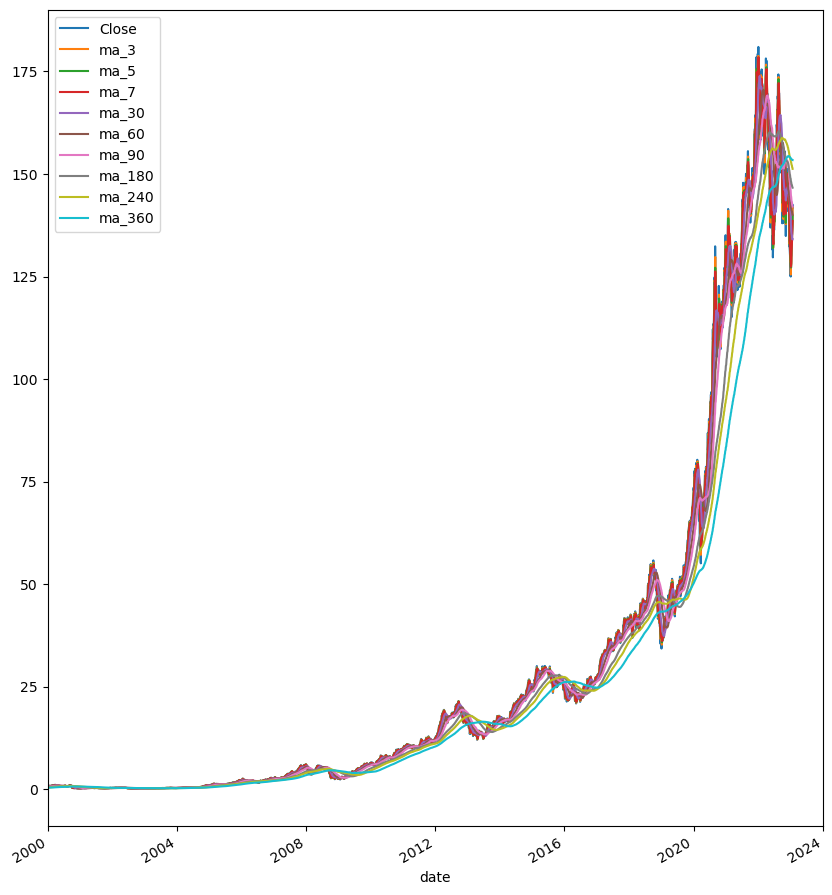

In [135]:
data[['Close','ma_3','ma_5','ma_7','ma_30','ma_60','ma_90','ma_180','ma_240','ma_360']].plot(xlim=['2000','2024'],figsize=(10,12))

## Cummulative Moving Average

We use expanding function 

In [136]:
data['cma']=data['Close'].expanding().mean()

<AxesSubplot:xlabel='date'>

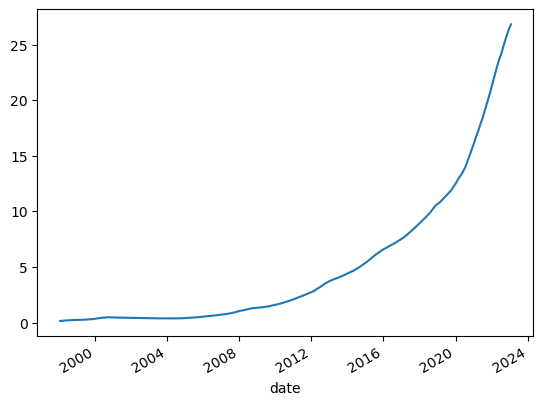

In [137]:
data.cma.plot()

In [138]:
data['exp_3']=data['Close'].ewm(span=3).mean()

In [139]:
data['exp_5']=data['Close'].ewm(span=5).mean()

In [140]:
data['exp_7']=data['Close'].ewm(span=7).mean()

In [141]:
data['exp_30']=data['Close'].ewm(span=30).mean()

In [142]:
data['exp_60']=data['Close'].ewm(span=60).mean()

In [143]:
data['exp_90']=data['Close'].ewm(span=90).mean()

In [144]:
data['exp_180']=data['Close'].ewm(span=180).mean()

In [145]:
data['exp_240']=data['Close'].ewm(span=240).mean()

In [146]:
data['exp_360']=data['Close'].ewm(span=360).mean()

In [147]:
data


,Open,High,Low,Close,Volume,Dividends,Stock Splits,tomorrow,target,ma_3,...,cma,exp_3,exp_5,exp_7,exp_30,exp_60,exp_90,exp_180,exp_240,exp_360
date,,,,,,,,,,,,,,,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,0.145558,0,NaN,...,0.147936,0.147936,0.147936,0.147936,0.147936,0.147936,0.147936,0.147936,0.147936,0.147936
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,0.146034,1,NaN,...,0.146747,0.146351,0.146509,0.146577,0.146708,0.146727,0.146734,0.146741,0.146742,0.146744
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,0.140802,0,0.146509,...,0.146509,0.146170,0.146284,0.146342,0.146468,0.146488,0.146495,0.146502,0.146504,0.146506
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,0.139374,0,0.144131,...,0.145082,0.143307,0.144007,0.144316,0.144907,0.144995,0.145024,0.145053,0.145061,0.145068
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,0.134617,0,0.142070,...,0.143941,0.141277,0.142228,0.142696,0.143648,0.143794,0.143843,0.143892,0.143904,0.143916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,137.869995,1,135.473338,...,26.755566,135.136187,134.578412,133.964485,134.838612,138.832865,141.709510,146.325944,147.130622,145.302829
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,141.110001,1,136.116669,...,26.773234,136.503091,135.675607,134.940862,135.034185,138.801296,141.625125,146.232508,147.053770,145.261650
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,142.529999,1,138.083333,...,26.791412,138.806546,137.487071,136.483147,135.426173,138.876991,141.613803,146.175906,147.004444,145.238649


In [148]:
data['daily_returns']=data['Close'].pct_change()

In [149]:
data.dropna(inplace=True)

In [150]:
data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
tomorrow         0
target           0
ma_3             0
ma_5             0
ma_7             0
ma_30            0
ma_60            0
ma_90            0
ma_180           0
ma_240           0
ma_360           0
cma              0
exp_3            0
exp_5            0
exp_7            0
exp_30           0
exp_60           0
exp_90           0
exp_180          0
exp_240          0
exp_360          0
daily_returns    0
dtype: int64

In [151]:
data.corr()['Close'].T

Open             0.999808
High             0.999910
Low              0.999913
Close            1.000000
Volume          -0.426116
Dividends        0.080355
Stock Splits     0.008252
tomorrow         0.999709
target          -0.004858
ma_3             0.999845
ma_5             0.999685
ma_7             0.999526
ma_30            0.997605
ma_60            0.995461
ma_90            0.994003
ma_180           0.989433
ma_240           0.985671
ma_360           0.979754
cma              0.968279
exp_3            0.999910
exp_5            0.999791
exp_7            0.999669
exp_30           0.998305
exp_60           0.996814
exp_90           0.995482
exp_180          0.991761
exp_240          0.989551
exp_360          0.986023
daily_returns   -0.003221
Name: Close, dtype: float64

## 2nd Random Forest Model with MA,EMA,CMA,Daily Returns

In [152]:

model2 = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [153]:

train = data.iloc[:5500]
test = data.iloc[5500:]

predictors = ['ma_3', 'ma_5', 'ma_7', 'ma_30', 'ma_60', 'ma_90',
       'ma_180', 'ma_240', 'ma_360', 'cma', 'exp_3', 'exp_5', 'exp_7',
       'exp_30', 'exp_60', 'exp_90', 'exp_180', 'exp_240', 'exp_360',
       'daily_returns', "Close", "Volume", "Open", "High", "Low"]
model2.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [154]:
model2.score(test[predictors],test['target'])

0.49537037037037035

In [155]:
preds = model2.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5142857142857142

In [156]:

ac = accuracy_score(test['target'],preds)
print('Accuracy is: ',ac)

Accuracy is:  0.49537037037037035


              precision    recall  f1-score   support

           0       0.49      0.92      0.64       213
           1       0.51      0.08      0.14       219

    accuracy                           0.50       432
   macro avg       0.50      0.50      0.39       432
weighted avg       0.50      0.50      0.39       432



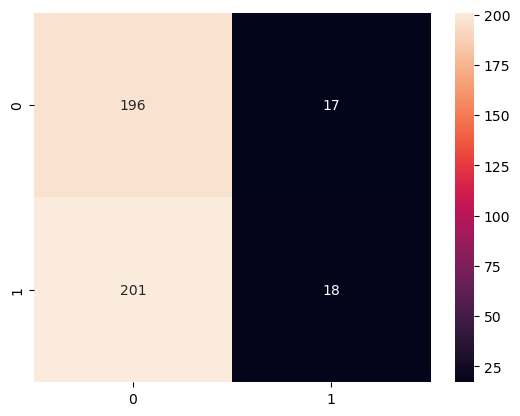

In [157]:
cm = confusion_matrix(test['target'], preds)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(test['target'], preds))

In [158]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'tomorrow', 'target', 'ma_3', 'ma_5', 'ma_7', 'ma_30', 'ma_60', 'ma_90',
       'ma_180', 'ma_240', 'ma_360', 'cma', 'exp_3', 'exp_5', 'exp_7',
       'exp_30', 'exp_60', 'exp_90', 'exp_180', 'exp_240', 'exp_360',
       'daily_returns'],
      dtype='object')

## 2nd Logistic Model with MA,EMA,CMA,Daily Returns

In [164]:

log.fit(train[predictors], train["target"])

#log.score(test[predictors],test['target'])

LogisticRegression()

In [165]:
preds = log.predict(test[predictors])

In [166]:
preds = log.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5069444444444444

In [167]:

log.score(test[predictors],test["target"],)

0.5069444444444444